# Jane Chinwuko
# Batch number: DS2307

### Project Description
The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

### Key attributes of the database
The database includes the following indicators:

##### •	`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
##### •	`country_long` (text): longer form of the country designation
##### •	`name` (text): name or title of the power plant, generally in Romanized form
##### •	`gppd_idnr` (text): 10 or 12 character identifier for the power plant
##### •	`capacity_mw` (number): electrical generating capacity in megawatts
##### •	`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
##### •	`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
##### •	`primary_fuel` (text): energy source used in primary electricity generation or export
##### •	`other_fuel1` (text): energy source used in electricity generation or export
##### •	`other_fuel2` (text): energy source used in electricity generation or export
##### •	`other_fuel3` (text): energy source used in electricity generation or export
##### •	 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
##### •	`owner` (text): majority shareholder of the power plant, generally in Romanized form
##### •	`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
##### •	`url` (text): web document corresponding to the `source` field
##### •	`geolocation_source` (text): attribution for geolocation information
##### •	`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
##### •	`year_of_capacity_data` (number): year the capacity information was reported
##### •	`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
##### •	`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
##### •	`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
##### •	`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
##### •	`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
##### •	`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
##### •	`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
##### •	`generation_data_source` (text): attribution for the reported generation information
##### •	`estimated_generation_gwh: estimated electricity generation in gigawatt-hours



In [2]:
# Imported necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score, auc
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

In [4]:
#loaded the dataset to a Pandas DataFrame
power_plant = pd.read_csv('database_IND.csv')

## Exploratory Data Analysis

In [5]:
#Viewing the first 10 rows in our dataset
power_plant.head(10)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.7470,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.3700,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
5,IND,India,AKRIMOTA LIG,IND0000003,250.0,23.7689,68.6447,Coal,Oil,NaN,...,2019.0,NaN,1153.421000,1208.8520,1175.765000,1147.913000,976.655000,NaN,Central Electricity Authority,NaN
6,IND,India,ALIYAR,IND0000004,60.0,10.4547,77.0078,Hydro,NaN,NaN,...,2019.0,NaN,157.558250,152.1952,61.421350,89.629600,48.327150,NaN,Central Electricity Authority,NaN
7,IND,India,ALLAIN DUHANGAN,IND0000005,192.0,32.2258,77.2070,Hydro,NaN,NaN,...,2019.0,NaN,674.391100,721.3352,675.724400,679.594950,579.318850,NaN,Central Electricity Authority,NaN
8,IND,India,ALMATTI DAM,IND0000006,290.0,16.3300,75.8863,Hydro,NaN,NaN,...,2019.0,NaN,480.594950,144.4342,402.029750,439.372100,406.377900,NaN,Central Electricity Authority,NaN
9,IND,India,AMAR KANTAK,IND0000007,210.0,23.1642,81.6373,Coal,Oil,NaN,...,2019.0,NaN,1887.904000,1643.0460,1338.093000,1563.457000,1487.880000,NaN,Central Electricity Authority,NaN


We have a lot of NaN in our data.

In [4]:
#Viewing the last 10 rows in our dataset
power_plant.tail(10)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
897,IND,India,Wind power project by Riddhi Siddhi Gluco Biol...,WRI1026753,34.65,8.8709,77.4466,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
898,IND,India,Wind power project in Rajasthan,WRI1026769,42.00,27.1715,70.6877,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
899,IND,India,YAMUNANAGAR TPP,IND0000511,600.00,30.1081,77.3257,Coal,Oil,NaN,...,2019.0,NaN,3194.35982,3709.552200,3123.572061,3156.053669,3039.66118,NaN,Central Electricity Authority,NaN
900,IND,India,YASHWANTRAO MOHITE,WRI1019995,16.00,17.1653,74.2456,Biomass,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
901,IND,India,YELHANKA (DG),IND0000512,106.60,13.1156,77.5838,Oil,NaN,NaN,...,2019.0,NaN,0.00000,0.000000,0.000000,NaN,0.00000,NaN,Central Electricity Authority,NaN
902,IND,India,YERMARUS TPP,IND0000513,1600.00,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.50000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.00,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.50,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.00,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.50,9.9344,77.4768,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Viewing the dimensions of the array
power_plant.shape

(907, 27)

This dataset contains 907 rows and 27 columns (made up of the independent and target variables)

In [6]:
#Viewing the columns present in the dataset
columns = power_plant.columns
columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

We have 27 columns in our dataset

In [7]:
#Generating the descriptive statistics of all the features in the dataset
power_plant.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
count,907.000000,861.000000,861.000000,0.0,527.000000,0.0,519.0,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0,0.0
mean,326.223755,21.197918,77.464907,NaN,1997.091082,NaN,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,NaN
std,590.085456,6.239612,4.939316,NaN,17.082868,NaN,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,16.725000,16.773900,74.256200,NaN,1988.000000,NaN,2019.0,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN,NaN
50%,59.200000,21.780000,76.719500,NaN,2001.000000,NaN,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN
75%,385.250000,25.512400,79.440800,NaN,2012.000000,NaN,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2019.0,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN,NaN


Some columns contains on NaNs and no other values. We dropped those columns because we do not have values to input.

In [8]:
#displaying the descriptive statistics of our categorical variables
power_plant.describe(include='object')

,country,country_long,name,gppd_idnr,primary_fuel,other_fuel1,other_fuel2,owner,source,url,geolocation_source,generation_data_source
count,907,907,907,907,907,198,1,342,907,907,888,449
unique,1,1,907,907,8,3,1,280,191,304,3,1
top,IND,India,ACME Solar Tower,WRI1020239,Coal,Oil,Oil,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,Central Electricity Authority
freq,907,907,1,1,258,195,1,4,519,519,765,449


We can see that the counts are not the same. So variables have missing values. 

In [9]:
#Displays the basic information about the columns in the dataset
power_plant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

From the info displayed above, we can see that some columns have little or no data. We shall drop those columns.

In [10]:
#Drop the columns having only NaNs
power_plant = power_plant.drop(['other_fuel1','other_fuel2','other_fuel3','wepp_id','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh'], axis=1) 

In [11]:
#create another column for the total generation of 2014 to 2019
power_plant['total_generation_gwh'] = power_plant['generation_gwh_2014'] + power_plant['generation_gwh_2015'] + power_plant['generation_gwh_2016'] + power_plant['generation_gwh_2017'] + power_plant['generation_gwh_2018'] 

#Drop the columns not required for our model
power_plant = power_plant.drop(['country','name','year_of_capacity_data','owner','url','generation_data_source','gppd_idnr','source','commissioning_year','geolocation_source','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018'], axis=1) 

We have the figures of power generated from 2013 to 2019. We added up these columns to form only one column(total_generation_gwh).

Some columns are not neccessary for our analysis and prediction. So we dropped them. We shall drop the country column since we have the country_long column.

In [12]:
#Displays the unique value for all features
power_plant.nunique()

country_long              1
capacity_mw             361
latitude                836
longitude               827
primary_fuel              8
total_generation_gwh    381
dtype: int64

We have only one country in our dataset

In [13]:
def columns_values(new_df):
    for i in new_df.columns:
        print(new_df[i].value_counts())
        print('\n')
        
columns_values(power_plant)

India    907
Name: country_long, dtype: int64


5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64


19.0004    3
24.1917    3
24.8747    2
13.2450    2
11.5336    2
          ..
22.7554    1
27.1598    1
17.2970    1
20.8772    1
9.9344     1
Name: latitude, Length: 836, dtype: int64


71.6917    4
75.8988    3
71.6918    3
72.8983    3
81.2875    3
          ..
70.3961    1
74.2393    1
77.0435    1
73.8254    1
77.4768    1
Name: longitude, Length: 827, dtype: int64


Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64


0.000000        11
3637.554320      1
632.412050       1
36157.280000     1
1614.098950      1
                ..
5820.020000      1
885.928100       1
27973.059128     1
32152.510000     1
16223.198930     1
Name: total_generation_

In [14]:
#This returns the count of unique occurrences in the primary_fuel column
power_plant['primary_fuel'].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

Coal is the highest energy source used in primary electricity generation in India. Followed by Hydro, Solar and others.

### Data Visualization

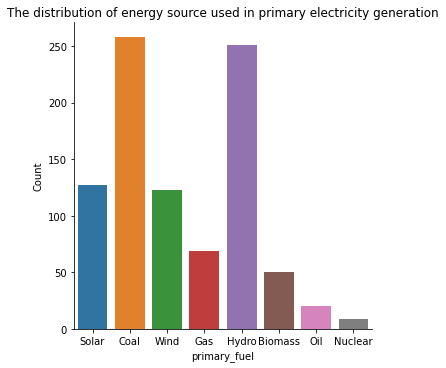

In [15]:
# This catplot shows the distribution of energy source used in primary electricity generation.
sns.catplot(x ='primary_fuel', data = power_plant, kind = 'count')
plt.title('The distribution of energy source used in primary electricity generation')
plt.xlabel('primary_fuel')
plt.ylabel('Count')
plt.show()

Coal is the highest energy source used in primary electricity generation or export in India

In [16]:
#This returns the count of unique occurrences in the capacity_mw column
power_plant['capacity_mw'].value_counts()

5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64

<AxesSubplot:xlabel='capacity_mw', ylabel='Count'>

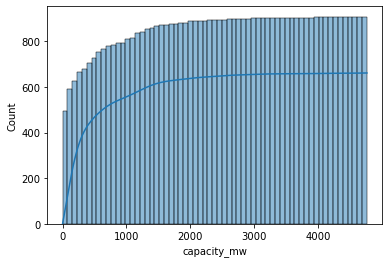

In [7]:
# countplot showing the sex of the passengers(survived or did not survive)
sns.histplot(power_plant['capacity_mw'],cumulative=True, kde=True)

The data distribution shows a steady increase in the capacity of electricity generated.

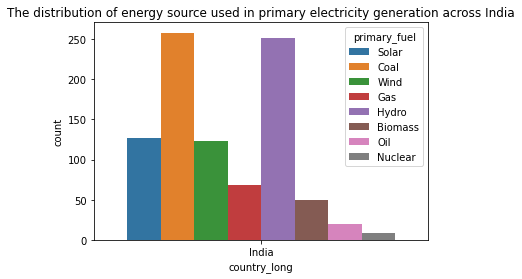

In [17]:
# countplot showing the distribution of energy source used in primary electricity generation across India
sns.countplot(x='country_long', hue='primary_fuel', data=power_plant)
plt.title('The distribution of energy source used in primary electricity generation across India')
plt.show()

India is heavily dependent on coal and Hydro. India's primary source of electricity is coal, although the amount of electricity produced by renewable sources is gradually increasing.

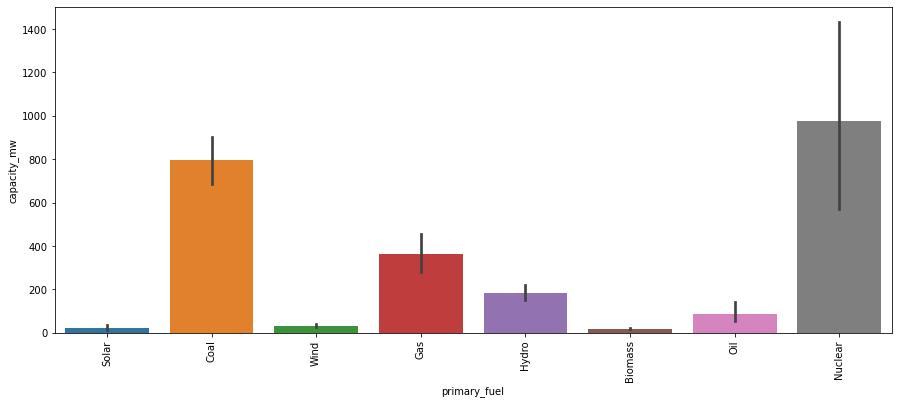

In [20]:
# barplot showing the relationship between energy source used in primary electricity generation and electrical generating capacity
plt.figure(figsize = (15,6))
sns.barplot(x = 'primary_fuel',y='capacity_mw',data = power_plant)
plt.xticks(rotation = 90)
plt.show()

From the barplot, we have about 1000 megawatts electricity generated from the Nuclear energy source in India as at 2019.

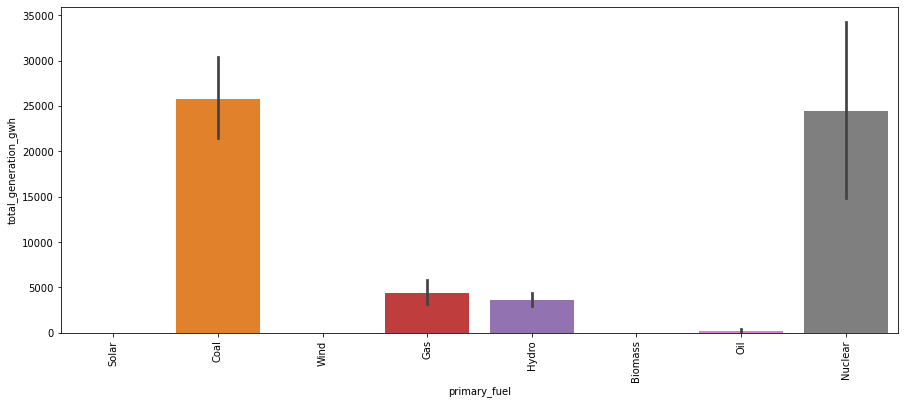

In [21]:
# barplot showing the relationship between energy source used in primary electricity generation and the total electricity generation
plt.figure(figsize = (15,6))
sns.barplot(x = 'primary_fuel',y='total_generation_gwh',data = power_plant)
plt.xticks(rotation = 90)
plt.show()

Power is produced in India using both conventional (thermal, nuclear, and hydro) and renewable (wind, solar, biomass, etc.) sources. But the majority of electricity is produced in thermal power plants using coal, accounting for around 75% of all power generated.

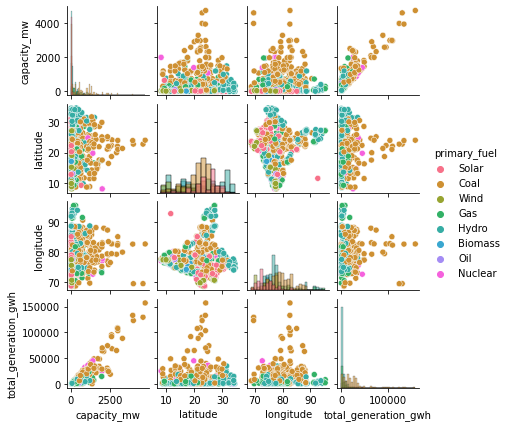

In [19]:
#pairplot showing the distribution of the variables
sns.pairplot(power_plant, diag_kind="hist", hue="primary_fuel", height=1.5, palette = 'husl')

There is a positive relation between the total electricity generated and the electrical generating capacity. The higher the plant power generating capacity the more electricity is generated.

## Data Pre-Processing

In [22]:
#Drop the country_long columns
power_plant = power_plant.drop(['country_long'], axis=1) 

We have only India in our dataset. We dont need the country_long column anymore. We shall drop the column.

In [23]:
#checking for missing values
power_plant.isna().sum()

capacity_mw               0
latitude                 46
longitude                46
primary_fuel              0
total_generation_gwh    516
dtype: int64

In [24]:
#Size of dataset
power_plant.shape

(907, 5)

In [25]:
# Printing the total number of duplicates across all the columns
duplicated = power_plant.duplicated()

print("The number of duplicates in the dataset is:", power_plant.duplicated().sum())

The number of duplicates in the dataset is: 6


In [26]:
#display the duplicates
power_plant[duplicated]

,capacity_mw,latitude,longitude,primary_fuel,total_generation_gwh
479,9.0,NaN,NaN,Hydro,NaN
502,50.0,NaN,NaN,Solar,NaN
538,5.0,NaN,NaN,Hydro,NaN
674,22.5,NaN,NaN,Wind,NaN
732,6.6,NaN,NaN,Hydro,NaN
741,4.0,NaN,NaN,Hydro,NaN


In [27]:
#Removing the duplicates
power_plant.drop_duplicates(inplace=True)

We removed the duplicates in our dataset

In [28]:
#dimension of the dataset after removing duplicates
power_plant.shape

(901, 5)

In [29]:
power_plant['total_generation_gwh'].fillna((power_plant['total_generation_gwh'].mean()), inplace=True)

We have 516 missing values in our total_generation_gwh columns. We cannot drop as this will means us loosing a large part of our data. We shall fill the missing values with the mean value.

In [30]:
#checking for missing values after filling total generation with mean
power_plant.isna().sum()

capacity_mw              0
latitude                40
longitude               40
primary_fuel             0
total_generation_gwh     0
dtype: int64

In [31]:
#Repalce NaN with zero on all columns 
power_plant = power_plant.fillna(0)

We replaced the missing values in the latitude, longitude and total_generation_gwh column with 0 since the missing data is small. 

In [32]:
#checking for missing values after resolving missing values
power_plant.isna().sum()

capacity_mw             0
latitude                0
longitude               0
primary_fuel            0
total_generation_gwh    0
dtype: int64

In [33]:
#import Label Encoder from sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,MinMaxScaler

#Converted all categorical values to number
#Selects the columns that are not integer
columns = list(power_plant.select_dtypes(exclude=['float64','int64']))
le = LabelEncoder()
for i in columns:
 #print(i)
 power_plant[i] = le.fit_transform(power_plant[i])
power_plant.dtypes

capacity_mw             float64
latitude                float64
longitude               float64
primary_fuel              int32
total_generation_gwh    float64
dtype: object

We converted all the categorical variables to numerical variables.

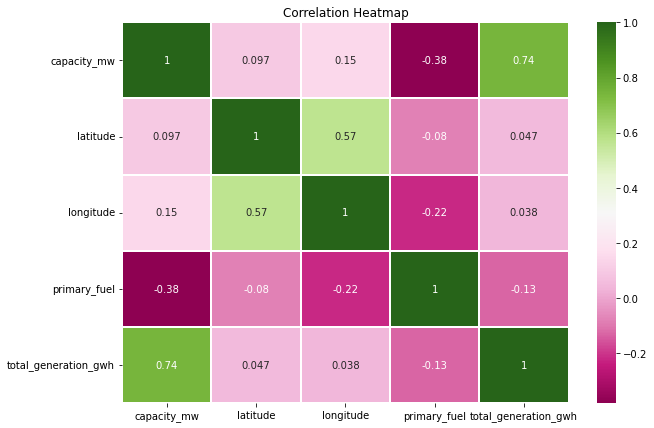

In [34]:
# Using heatmap to visualize the correlation between the numerical features.
plt.figure(figsize=(10,7))
sns.heatmap(power_plant.corr(), annot=True, linewidths = 2, cmap='PiYG')
plt.title('Correlation Heatmap')
plt.show()

There is a strong positive correlation between electrical generating capacity and the total electricity generated. The higher the plant power generating capacity the more electricity is generated. There's a correlation between longitude and latitude. Latitude and longitude work together to help geographers, cartographers, and other researchers find locations across the world.

In [35]:
#Viewing the first 10 rows in our dataset
power_plant.head(10)

,capacity_mw,latitude,longitude,primary_fuel,total_generation_gwh
0,2.5,28.1839,73.2407,6,13114.831488
1,98.0,24.7663,74.6090,1,13114.831488
2,39.2,21.9038,69.3732,7,13114.831488
3,135.0,23.8712,91.3602,2,3637.554320
4,1800.0,21.9603,82.4091,1,27859.499736
5,250.0,23.7689,68.6447,1,5662.606000
6,60.0,10.4547,77.0078,3,509.131550
7,192.0,32.2258,77.2070,3,3330.364500
8,290.0,16.3300,75.8863,3,1872.808900
9,210.0,23.1642,81.6373,1,7920.380000


In [36]:
# split data into x and y
X = power_plant.drop('primary_fuel',axis =1)
y = power_plant['primary_fuel']
X

,capacity_mw,latitude,longitude,total_generation_gwh
0,2.5,28.1839,73.2407,13114.831488
1,98.0,24.7663,74.6090,13114.831488
2,39.2,21.9038,69.3732,13114.831488
3,135.0,23.8712,91.3602,3637.554320
4,1800.0,21.9603,82.4091,27859.499736
...,...,...,...,...
902,1600.0,16.2949,77.3568,13114.831488
903,3.0,12.8932,78.1654,13114.831488
904,25.5,15.2758,75.5811,13114.831488
905,80.0,24.3500,73.7477,13114.831488


In [37]:
#Standardization of a dataset
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X)
X_test=sc.transform(X)
tabel_col = X.columns
x = pd.DataFrame(X_train, columns = tabel_col)
x

,capacity_mw,latitude,longitude,total_generation_gwh
0,-0.551087,1.057182,-0.047101,0.000000
1,-0.389544,0.601398,0.034984,0.000000
2,-0.489007,0.219645,-0.279114,0.000000
3,-0.326957,0.482025,1.039896,-0.680985
4,2.489472,0.227180,0.502915,1.059471
...,...,...,...,...
896,2.151162,-0.528378,0.199826,0.000000
897,-0.550241,-0.982040,0.248334,0.000000
898,-0.512181,-0.664288,0.093301,0.000000
899,-0.419992,0.545879,-0.016686,0.000000


In [38]:
from imblearn.over_sampling import SMOTE
#Used oversampling to handling imbalance in the Type of Glass column
term_sm = SMOTE()
X_res, y_res = term_sm.fit_resample(x, y)
y_res.value_counts()

6    258
1    258
7    258
2    258
3    258
0    258
5    258
4    258
Name: primary_fuel, dtype: int64

There was class imbalance in our primary_fuel column. So we used the SMOTE algorithm to balance the classes.

# Model Building for Primary Fuel Prediction

In [39]:
# splitting the features into train and test
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.20, random_state = 42)

# Viewing the dimensions of our training and testing data
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1651, 4), (413, 4), (1651,), (413,))

We splitted our data in X_train, X_test, y_train and y_test. We shall be using the train variables for the purpose of training our model while the test variables will be used to validate the performance of our model. 80% of our data will be used to train the model while 20% will be used for model validation.

In [40]:
# Create a Xgboost classifier
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"The Accuracy for Xgboost Classifier is: ",accuracy)
print('\n')

# Display a classification report for more detailed metrics
report = classification_report(y_test, y_pred_xgb)
print(confusion_matrix(y_test, y_pred_xgb))
print('\n')
print("Classification Report:")
print(report)

The Accuracy for Xgboost Classifier is:  0.8547215496368039


[[45  0  0  0  0  0  1  1]
 [ 0 34  3  5  4  0  1  5]
 [ 0  2 37  2  1  1  0  0]
 [ 2  3  1 37  0  0  2  6]
 [ 0  1  2  0 49  0  0  0]
 [ 0  1  1  1  0 56  0  2]
 [ 0  0  1  1  0  0 45  2]
 [ 1  0  0  2  0  1  4 50]]


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        47
           1       0.83      0.65      0.73        52
           2       0.82      0.86      0.84        43
           3       0.77      0.73      0.75        51
           4       0.91      0.94      0.92        52
           5       0.97      0.92      0.94        61
           6       0.85      0.92      0.88        49
           7       0.76      0.86      0.81        58

    accuracy                           0.85       413
   macro avg       0.85      0.85      0.85       413
weighted avg       0.86      0.85      0.85       413



In [41]:
results = []
scores = cross_val_score(xgb, X_train, y_train, cv=5) 
print("Cross-validation scores:", scores)

# Calculate and print the mean of the scores
mean_score = scores.mean()

print(f"Mean accuracy: {mean_score:.2f}")

print('\n')
print(f'The difference between the accuracy score and the cross validation score is: {accuracy- mean_score}')


diff = accuracy - mean_score
results.append(['Xgboost Classifier', accuracy, mean_score, diff])

Cross-validation scores: [0.85800604 0.85151515 0.81515152 0.84545455 0.83636364]
Mean accuracy: 0.84


The difference between the accuracy score and the cross validation score is: 0.013423371480619783


In [42]:
# Create a Gradient Boosting Classifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred_gb)
print(f"The Accuracy for Gradient Boosting Classifier is: ",accuracy)
print('\n')

# Display a classification report for more detailed metrics
report = classification_report(y_test, y_pred_gb)
print(confusion_matrix(y_test, y_pred_gb))
print('\n')
print("Classification Report:")
print(report)

The Accuracy for Gradient Boosting Classifier is:  0.8111380145278451


[[41  0  0  0  0  0  3  3]
 [ 3 31  7  4  3  0  2  2]
 [ 0  3 37  1  0  2  0  0]
 [ 3  5  3 31  0  0  2  7]
 [ 0  1  0  0 51  0  0  0]
 [ 0  2  1  1  0 55  0  2]
 [ 1  1  1  1  0  0 42  3]
 [ 3  1  0  2  0  1  4 47]]


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.87      0.84        47
           1       0.70      0.60      0.65        52
           2       0.76      0.86      0.80        43
           3       0.78      0.61      0.68        51
           4       0.94      0.98      0.96        52
           5       0.95      0.90      0.92        61
           6       0.79      0.86      0.82        49
           7       0.73      0.81      0.77        58

    accuracy                           0.81       413
   macro avg       0.81      0.81      0.81       413
weighted avg       0.81      0.81      0.81       413



In [43]:
scores1 = cross_val_score(gb, X_train, y_train, cv=5) 
print("Cross-validation scores:", scores1)

# Calculate and print the mean of the scores
mean_score = scores1.mean()

print(f"Mean accuracy: {mean_score:.2f}")

print('\n')
print(f'The difference between the accuracy score and the cross validation score is: {accuracy- mean_score}')


diff = accuracy - mean_score
results.append(['Gradient Boosting Classifier', accuracy, mean_score, diff])

Cross-validation scores: [0.81873112 0.80606061 0.77272727 0.77878788 0.81515152]
Mean accuracy: 0.80


The difference between the accuracy score and the cross validation score is: 0.012846336417435933


In [44]:
# Create a Decision Tree classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred_dt)
print(f"The Accuracy for Decision Tree: {accuracy:.2f}")
print('\n')
# Display a classification report for more detailed metrics
report = classification_report(y_test, y_pred_dt)
print(confusion_matrix(y_test, y_pred_dt))
print('\n')
print("Classification Report:")
print(report)

The Accuracy for Decision Tree: 0.83


[[45  0  1  0  0  0  1  0]
 [ 2 32  3  5  3  0  3  4]
 [ 0  4 37  1  0  1  0  0]
 [ 4  3  2 33  0  1  3  5]
 [ 0  5  0  0 47  0  0  0]
 [ 0  1  2  2  0 53  0  3]
 [ 0  1  0  3  0  0 43  2]
 [ 0  0  0  2  0  1  2 53]]


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92        47
           1       0.70      0.62      0.65        52
           2       0.82      0.86      0.84        43
           3       0.72      0.65      0.68        51
           4       0.94      0.90      0.92        52
           5       0.95      0.87      0.91        61
           6       0.83      0.88      0.85        49
           7       0.79      0.91      0.85        58

    accuracy                           0.83       413
   macro avg       0.83      0.83      0.83       413
weighted avg       0.83      0.83      0.83       413



In [45]:
scores2 = cross_val_score(dt, X_train, y_train,cv=5)
print("Cross-validation scores:", scores2)

# Calculate and print the mean of the scores
mean_score = scores2.mean()

print(f"Mean accuracy: {mean_score:.2f}")
print('\n')
print(f'The difference between the accuracy score and the cross validation score is: {accuracy- mean_score}')


diff = accuracy - mean_score
results.append(['Decision Tree',accuracy, mean_score, diff])

Cross-validation scores: [0.78247734 0.78484848 0.77878788 0.76363636 0.81515152]
Mean accuracy: 0.78


The difference between the accuracy score and the cross validation score is: 0.04552815781347708


In [46]:
# Create a Random Forest classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"The Accuracy for Random Forest is: {accuracy:.2f}")
print('\n')
# Display a classification report for more detailed metrics
report = classification_report(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print('\n')
print("Classification Report:")
print(report)

The Accuracy for Random Forest is: 0.84


[[44  0  1  0  0  0  1  1]
 [ 2 32  3  5  4  0  2  4]
 [ 0  2 39  0  0  2  0  0]
 [ 4  2  2 30  1  0  5  7]
 [ 0  1  1  0 50  0  0  0]
 [ 0  1  0  1  0 56  0  3]
 [ 1  1  0  1  0  0 45  1]
 [ 2  0  0  2  0  1  2 51]]


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.94      0.88        47
           1       0.82      0.62      0.70        52
           2       0.85      0.91      0.88        43
           3       0.77      0.59      0.67        51
           4       0.91      0.96      0.93        52
           5       0.95      0.92      0.93        61
           6       0.82      0.92      0.87        49
           7       0.76      0.88      0.82        58

    accuracy                           0.84       413
   macro avg       0.84      0.84      0.83       413
weighted avg       0.84      0.84      0.84       413



In [47]:
scores3 = cross_val_score(rf, X_train, y_train,cv=5)  # You can choose a different scoring metric
print("Cross-validation scores:", scores3)

# Calculate and print the mean of the scores
mean_score = scores3.mean()

print(f"Mean accuracy: {mean_score:.2f}")
print('\n')
print(f'The difference between the accuracy score and the cross validation score is: {accuracy- mean_score}')


diff = accuracy - mean_score
results.append(['Random Forest',accuracy, mean_score, diff])

Cross-validation scores: [0.85800604 0.85151515 0.83636364 0.83636364 0.82424242]
Mean accuracy: 0.84


The difference between the accuracy score and the cross validation score is: -0.0011044735557000918


In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
prediction_knn = knn.predict(X_test)
accuracy = accuracy_score(y_test, prediction_knn)
# Display a classification report for more detailed metrics
print(f"The Accuracy for knn is: ", accuracy)
print('\n')

print(confusion_matrix(y_test, prediction_knn))
print(classification_report(y_test, prediction_knn))

The Accuracy for knn is:  0.7481840193704601


[[44  0  0  0  0  0  3  0]
 [ 5 23  4  4 12  1  2  1]
 [ 0  2 35  2  1  3  0  0]
 [ 3  4  7 25  0  1  1 10]
 [ 0  2  2  0 47  1  0  0]
 [ 3  1  4  1  0 51  0  1]
 [ 6  0  1  1  1  1 37  2]
 [ 2  2  1  1  0  1  4 47]]
              precision    recall  f1-score   support

           0       0.70      0.94      0.80        47
           1       0.68      0.44      0.53        52
           2       0.65      0.81      0.72        43
           3       0.74      0.49      0.59        51
           4       0.77      0.90      0.83        52
           5       0.86      0.84      0.85        61
           6       0.79      0.76      0.77        49
           7       0.77      0.81      0.79        58

    accuracy                           0.75       413
   macro avg       0.74      0.75      0.74       413
weighted avg       0.75      0.75      0.74       413



In [49]:
scores4 = cross_val_score(knn, X_train, y_train,cv=5) 
print("Cross-validation scores:", scores4)

# Calculate and print the mean of the scores
mean_score = scores4.mean()

print(f"Mean accuracy: {mean_score:.2f}")

print('\n')
print(f'The difference between the accuracy score and the cross validation score is: {accuracy- mean_score}')


diff = accuracy - mean_score
results.append(['k-Nearest Neighbors',accuracy, mean_score, diff])

Cross-validation scores: [0.80362538 0.79393939 0.73939394 0.77272727 0.75757576]
Mean accuracy: 0.77


The difference between the accuracy score and the cross validation score is: -0.02526832888551367


#### Difference between accuracy and Cross Validtion Score

In [50]:
# create dataframe for all the accuracy scores and cross validation score for the models used
df = pd.DataFrame(results, columns=['Algorithm', 'Accuracy Score','Cross Validation Score', 'Difference btw accuracy and Cross Validtion Score'])
df

,Algorithm,Accuracy Score,Cross Validation Score,Difference btw accuracy and Cross Validtion Score
0,Xgboost Classifier,0.854722,0.841298,0.013423
1,Gradient Boosting Classifier,0.811138,0.798292,0.012846
2,Decision Tree,0.830508,0.784980,0.045528
3,Random Forest,0.840194,0.841298,-0.001104
4,k-Nearest Neighbors,0.748184,0.773452,-0.025268


#### Selection of the best model

In [51]:
#Selection of the best model based on the difference between the accuracy and cross validation score
least_value = min(df['Difference btw accuracy and Cross Validtion Score'].tolist())
best_model = df.loc[(df['Difference btw accuracy and Cross Validtion Score']) == least_value, 'Algorithm']
best_model = ' '.join(str(best_model).split()[1:-4])
print('From the table above, my best model is the', best_model)

From the table above, my best model is the k-Nearest Neighbors


### Model Selection

For the primary_fuel prediction, we selected the k-Nearest Neighbors Classifier as our best model because it had the smallest value after the accuracy score was subtracted from the cross validation score.

In [52]:
from sklearn.model_selection import GridSearchCV

model_best = KNeighborsClassifier()

params_grid = {'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [53]:
gd_search = GridSearchCV(model_best, params_grid, cv = 5)
gd_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']})

In [54]:
#display the best parameters from the search

print("The best n_neighbors is : " + str(gd_search.best_params_["n_neighbors"]),
     "\nThe best weights: " + str(gd_search.best_params_["weights"]),
     "\nThe best metric: " + str(gd_search.best_params_["metric"]))

The best n_neighbors is : 5 
The best weights: distance 
The best metric: manhattan


In [55]:
# train the model with the selected parameter
power_model = KNeighborsClassifier(n_neighbors  = 5, weights= 'distance', metric = 'manhattan')
power_model.fit(X_train, y_train)
y_pred = power_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8256658595641646

In [56]:
import pickle
# save the model to disk
filename = 'power_plant.sav'
pickle.dump(power_model, open(filename, 'wb'))

In [57]:
#prediction using our saved model
load_model = pickle.load(open(filename, 'rb'))
accuracy_dataframe = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
accuracy_dataframe

,Actual,Predicted
1667,5,5
480,1,7
905,0,0
1151,2,2
29,7,5
...,...,...
408,7,7
194,7,7
781,1,1
1981,7,7


In [58]:
#This will revert the encoding done for the primary_fuel column
accuracy_dataframe['Actual']= le.inverse_transform(accuracy_dataframe['Actual'])
accuracy_dataframe['Predicted']= le.inverse_transform(accuracy_dataframe['Predicted'])
accuracy_dataframe

,Actual,Predicted
1667,Oil,Oil
480,Coal,Wind
905,Biomass,Biomass
1151,Gas,Gas
29,Wind,Oil
...,...,...
408,Wind,Wind
194,Wind,Wind
781,Coal,Coal
1981,Wind,Wind


# Model Building for capacity_mw  Prediction

In [87]:
#Viewing the first 10 rows in our dataset
power_plant.head(10)

,capacity_mw,latitude,longitude,primary_fuel,total_generation_gwh
0,2.5,28.1839,73.2407,6,13114.831488
1,98.0,24.7663,74.6090,1,13114.831488
2,39.2,21.9038,69.3732,7,13114.831488
3,135.0,23.8712,91.3602,2,3637.554320
4,1800.0,21.9603,82.4091,1,27859.499736
5,250.0,23.7689,68.6447,1,5662.606000
6,60.0,10.4547,77.0078,3,509.131550
7,192.0,32.2258,77.2070,3,3330.364500
8,290.0,16.3300,75.8863,3,1872.808900
9,210.0,23.1642,81.6373,1,7920.380000


In [88]:
# split data into x and y
X = power_plant.drop('capacity_mw',axis =1)
y = power_plant['capacity_mw']
X

,latitude,longitude,primary_fuel,total_generation_gwh
0,28.1839,73.2407,6,13114.831488
1,24.7663,74.6090,1,13114.831488
2,21.9038,69.3732,7,13114.831488
3,23.8712,91.3602,2,3637.554320
4,21.9603,82.4091,1,27859.499736
...,...,...,...,...
902,16.2949,77.3568,1,13114.831488
903,12.8932,78.1654,6,13114.831488
904,15.2758,75.5811,7,13114.831488
905,24.3500,73.7477,1,13114.831488


In [89]:
#Standardization of a dataset
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X)
X_test=sc.transform(X)
tabel_col = X.columns
x = pd.DataFrame(X_train, columns = tabel_col)
x

,latitude,longitude,primary_fuel,total_generation_gwh
0,1.057182,-0.047101,1.227345,0.000000
1,0.601398,0.034984,-0.964169,0.000000
2,0.219645,-0.279114,1.665647,0.000000
3,0.482025,1.039896,-0.525866,-0.680985
4,0.227180,0.502915,-0.964169,1.059471
...,...,...,...,...
896,-0.528378,0.199826,-0.964169,0.000000
897,-0.982040,0.248334,1.227345,0.000000
898,-0.664288,0.093301,1.665647,0.000000
899,0.545879,-0.016686,-0.964169,0.000000


In [90]:
# splitting the features into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

# Viewing the dimensions of our training and testing data
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((720, 4), (181, 4), (720,), (181,))

## 1. Random Forest Regressor

In [91]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
random_for= RandomForestRegressor()
random_for.fit(x_train, y_train)

rf_pred = random_for.predict(x_test)
train_predrd = random_for.predict(x_train)
mse = metrics.mean_absolute_error(y_test, rf_pred)
msqe = metrics.mean_squared_error(y_test, rf_pred)
r2_score = metrics.r2_score(y_test, rf_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, rf_pred))
print("mean_absolute_error : ", mse)
print("mean_squared_error  : ", msqe)
print("root_mean_absolute_error", rmse)
print("R2_score            : ", r2_score)
print("R2_score on training data : ", metrics.r2_score(y_train,train_predrd))
print('\n')

mean_absolute_error :  119.44454378764223
mean_squared_error  :  47788.985325097485
root_mean_absolute_error 218.60691966426288
R2_score            :  0.8730580025701999
R2_score on training data :  0.9626341454775399




### Cross Validation Score for Random Forest Regressor

In [92]:
cv_score1 = cross_val_score(random_for,x,y, cv=5, scoring = 'r2')
print(cv_score1)
print(cv_score1.mean())
print(f'The difference between the R2 score and the cross validation score is: {metrics.r2_score(y_test,rf_pred)- cv_score1.mean()}')

[0.81569853 0.81802738 0.7282655  0.78236421 0.79783555]
0.7884382340935806
The difference between the R2 score and the cross validation score is: 0.08461976847661934


## 2. Gradient Boosting Regressor

In [93]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
gb = GradientBoostingRegressor()
gb.fit(x_train, y_train)

gb_pred = gb.predict(x_test)
train_pred = gb.predict(x_train)
mse = metrics.mean_absolute_error(y_test, gb_pred)
msqe = metrics.mean_squared_error(y_test, gb_pred)
r2_score = metrics.r2_score(y_test, gb_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, gb_pred))
print("mean_absolute_error : ", mse)
print("mean_squared_error  : ", msqe)
print("root_mean_absolute_error", rmse)
print("R2_score            : ", r2_score)
print("R2_score on training data : ", metrics.r2_score(y_train,train_pred))
print('\n')

mean_absolute_error :  147.13007808682153
mean_squared_error  :  62210.53196751888
root_mean_absolute_error 249.4203920442731
R2_score            :  0.8347500133052644
R2_score on training data :  0.9049152892075188




### Cross Validation Score for Gradient Boosting Regressor

In [94]:
cv_score = cross_val_score(gb,x,y, cv=5, scoring = 'r2')
print(cv_score)
print(cv_score.mean())
print(f'The difference between the R2 score and the cross validation score is: {metrics.r2_score(y_test,gb_pred)- cv_score.mean()}')

[0.80880223 0.76702405 0.72486383 0.7682877  0.79898261]
0.7735920855080651
The difference between the R2 score and the cross validation score is: 0.06115792779719931


## 3. Decision Tree Regressor

In [95]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
dec_tree = DecisionTreeRegressor()
dec_tree.fit(x_train, y_train)
ypred_dc = dec_tree.predict(x_test)
train_preddc = dec_tree.predict(x_train)
mse = metrics.mean_absolute_error(y_test, ypred_dc)
msqe = metrics.mean_squared_error(y_test, ypred_dc)
r2_score = metrics.r2_score(y_test, ypred_dc)
rmse = np.sqrt(metrics.mean_squared_error(y_test, ypred_dc))
print("mean_absolute_error : ", mse)
print("mean_squared_error  : ", msqe)
print("root_mean_absolute_error", rmse)
print("R2_score            : ", r2_score)
print("R2_score on training data : ", metrics.r2_score(y_train,train_preddc))
print('\n')

mean_absolute_error :  128.79569981583793
mean_squared_error  :  74035.59904056661
root_mean_absolute_error 272.09483464514096
R2_score            :  0.8033390590072726
R2_score on training data :  0.998780646410449




### Cross Validation Score Decision Tree Regressor

In [96]:
cv_score2 = cross_val_score(dec_tree,x,y, cv=5, scoring = 'r2')
print(cv_score2)
print(cv_score2.mean())
print(f'The difference between the R2 score and the cross validation score is: {metrics.r2_score(y_test,ypred_dc)- cv_score2.mean()}')

[0.52779634 0.61953318 0.63591576 0.54077636 0.67253347]
0.5993110229366767
The difference between the R2 score and the cross validation score is: 0.20402803607059594


## 4. AdaBoost Regressor

In [97]:
#AdaBoost
from sklearn.ensemble import AdaBoostRegressor
from sklearn import metrics
ad = AdaBoostRegressor()
ad.fit(x_train, y_train)

ypredad = ad.predict(x_test)
train_predad = gb.predict(x_train)
mse = metrics.mean_absolute_error(y_test, ypredad)
msqe = metrics.mean_squared_error(y_test, ypredad)
r2_score = metrics.r2_score(y_test, ypredad)
rmse = np.sqrt(metrics.mean_squared_error(y_test, ypredad))
print("mean_absolute_error : ", mse)
print("mean_squared_error  : ", msqe)
print("root_mean_absolute_error", rmse)
print("R2_score            : ", r2_score)
print("R2_score on training data : ", metrics.r2_score(y_train,train_predad))
print('\n')

mean_absolute_error :  242.67363294790354
mean_squared_error  :  100851.83792073325
root_mean_absolute_error 317.5717838863101
R2_score            :  0.7321070187401345
R2_score on training data :  0.9049152892075188




### Cross Validation Score AdaBoost Regressor

In [98]:
cv_score2 = cross_val_score(ad,x,y, cv=5, scoring = 'r2')
print(cv_score2)
print(cv_score2.mean())
print(f'The difference between the R2 score and the cross validation score is: {metrics.r2_score(y_test,ypredad)- cv_score2.mean()}')

[0.25684278 0.4376246  0.67922105 0.70239172 0.74858802]
0.5649336320050361
The difference between the R2 score and the cross validation score is: 0.1671733867350984


## 5. Ridge

In [99]:
from sklearn.linear_model import Ridge
Ridge = Ridge()
Ridge.fit(x_train, y_train)
ypred_rd = Ridge.predict(x_test)
train_predrd = Ridge.predict(x_train)
mse = metrics.mean_absolute_error(y_test, ypred_rd)
msqe = metrics.mean_squared_error(y_test, ypred_rd)
r2_score = metrics.r2_score(y_test, ypred_rd)
rmse = np.sqrt(metrics.mean_squared_error(y_test, ypred_rd))
print("mean_absolute_error : ", mse)
print("mean_squared_error  : ", msqe)
print("root_mean_absolute_error", rmse)
print("R2_score            : ", r2_score)
print("R2_score on training data : ", metrics.r2_score(y_train,train_predrd))
print('\n')

mean_absolute_error :  241.81830409899658
mean_squared_error  :  114701.19643569375
root_mean_absolute_error 338.6756507865509
R2_score            :  0.6953189341836037
R2_score on training data :  0.6234006161186174




### Cross Validation Score for Ridge

In [100]:
cv_score4 = cross_val_score(Ridge,x,y, cv=5, scoring = 'r2')
print(cv_score4)
print(cv_score4.mean())
print(f'The difference between the R2 score and the cross validation score is: {metrics.r2_score(y_test,ypred_rd)- cv_score4.mean()}')

[0.54148174 0.47962807 0.6203746  0.65034182 0.73472606]
0.6053104580301808
The difference between the R2 score and the cross validation score is: 0.09000847615342289


### Model Selection

For the capacity_mw prediction, we selected the Gradient Boosting Regressor as our best model because it had the smallest value after the r2 score was subtracted from the cross validation score.

In [101]:
model_best = GradientBoostingRegressor()

model_param ={
        "n_estimators": [10, 500, 1000],
        "learning_rate": [0.01, 0.05, 0.1],
        "max_depth": [3, 5, 7],
        "subsample": [0.8, 0.9, 1.0]
    }

In [102]:
gd_search = GridSearchCV(model_best, model_param, cv = 5)

gd_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [10, 500, 1000],
                         'subsample': [0.8, 0.9, 1.0]})

In [103]:
#display the best parameters from the search
print("The best learning_rate is : " + str(gd_search.best_params_["learning_rate"]),
     "\nThe best n_estimators: " + str(gd_search.best_params_["n_estimators"]),
     "\nThe best max_depth: " + str(gd_search.best_params_["max_depth"]),
     "\nThe best subsample: " + str(gd_search.best_params_["subsample"]))

The best learning_rate is : 0.01 
The best n_estimators: 500 
The best max_depth: 3 
The best subsample: 0.8


In [104]:
# train the model with the selected parameters
New_model = GradientBoostingRegressor(learning_rate = 0.01, n_estimators  = 500, max_depth = 3, subsample = 0.8)

In [105]:
New_model.fit(x_train, y_train)
y_predmodel = New_model.predict(x_test)
train_predrd = New_model.predict(x_train)
mse_newmodel = metrics.mean_absolute_error(y_test, y_predmodel)
msqe_newmodel = metrics.mean_squared_error(y_test, y_predmodel)
r2_score_newmodel = metrics.r2_score(y_test, y_predmodel)
rmse_newmodel = np.sqrt(metrics.mean_squared_error(y_test, y_predmodel))
print("mean_absolute_error : ", mse_newmodel)
print("mean_squared_error  : ", msqe_newmodel)
print("root_mean_absolute_error", rmse_newmodel)
print("R2_score            : ", r2_score_newmodel)
print("R2_score on training data : ", metrics.r2_score(y_train,train_predrd))
print('\n')


mean_absolute_error :  144.76940705396407
mean_squared_error  :  58735.723270508526
root_mean_absolute_error 242.3545404371631
R2_score            :  0.8439801560606345
R2_score on training data :  0.8591542235898473




In [106]:
import pickle
# save the model to disk
filename = 'power_capacity.sav'
pickle.dump(New_model, open(filename, 'wb'))

In [107]:
#prediction using our saved model
load_model = pickle.load(open(filename, 'rb'))
result = load_model.score(x_test,y_test)
result

0.8439801560606345

In [108]:
accuracy_dataframe = pd.DataFrame([load_model.predict(x_test)[:],y_test[:]],index=['Predicted','Original'])
accuracy_dataframe

,0,1,2,3,4,5,6,7,8,9,...,171,172,173,174,175,176,177,178,179,180
Predicted,77.667966,258.891544,87.454867,40.696324,450.482833,29.599859,987.119186,630.406635,157.389278,106.444932,...,40.696324,372.997999,167.900245,375.918515,123.808033,1340.514039,43.082906,2820.612292,43.082906,176.812382
Original,22.800000,540.000000,12.000000,56.250000,705.000000,35.100000,500.000000,600.000000,25.200000,30.000000,...,1.700000,207.000000,69.600000,515.000000,60.000000,1500.000000,4.000000,3000.000000,50.000000,500.000000


## Conclusion:

We used the global power plant database with India as our case study to make predictions for Primary Fuel and capacity_mw. The dataset is made up 907 rows and 27 columns. Of these columns, we have 26 independent variables and 1 target variable(either Primary Fuel or  capacity_mw). Most of the columns have NaN values. We have a lot of missing values in our dataset. We visualized the relationships between some features. For this project, we built two models to make predictions for Primary Fuel and capacity_mw.  We used different algorithms to train our model. 80% of the data was used for taining while 20% was used for validation. The criteria we used in the selection of best model is the model with the least result after substracting the accuracy or r2 score from cross validation score. Below are the outcome of the two predictions made based on energy source used in primary electricity generation(primary_fuel) and electrical generating capacity(capacity_mw).

### Primary Fuel Prediction:
This is a multi-classification problem because the target variable is classified into more than two categories. From the count of the primary_fuel we saw that the counts where not balanced so we used the SMOTE algorithm to balance the count before building our model.  We used different classification algorithms to train our model. k-Nearest Neighbors is our best model because it had a lower difference between accuracy and cross validation score. The accuracy score before tuning was 0.748184 and after tuning with set parameters, there was an improvement in the accuracy score 0.82567. Testing the performance of the model, we can see that from the 10 predictions made, the model was able to predict 7 classes correctly. To improve the accuracy score further, we will need more data and also tune the model with other parameters.

### capacity_mw Prediction:
This is a regression problem because the target variable is continuous. From the training the model using capacity_mw as our target variable, we observed that the model was performing better on the training data than on the testing data which indicates overfitting. Also we recorded high mse and msqe values in all our models.  From the difference between the r2 and cross validation scores obtained, we selected the Gradient Boosting Regressor model as our best model because it had a lower value obtained from the difference between the r2 and cross validation scores. We used the grid search algorithm to select the best parameters for tuning our model and after training the model with the parameters, we observed that there was a slight improvement in the r2 score. The r2 score before tuning was 0.83475 and after tuning we got r2 score of 0.84398. The parameter tuning resolved the overfitting as the new model performed well on both the training and testing data. The true values differ from its prediction which could be attributed to the high mse value. For a better model performance, we will need to train with more data to reduce our mse.